<a href="https://colab.research.google.com/github/Whyawww/Clustering-Audiens-YoutubeAPIv3/blob/main/Clustering_Audiens.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME : **Wahyu Aji Nusantara**

---


CLUSTERING AUDIENS BERDASARKAN POLA ENGAGEMENT

In [1]:
pip install pandas numpy seaborn matplotlib requests

In [3]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import getpass
import os

if "kunciaja" not in os.environ :
  os.environ["kunciaja"] = getpass.getpass("Add API key")
  print("API key added to environment")
  kunciaja = os.environ["kunciaja"]
else :
  kunciaja = os.environ["kunciaja"]
  print("API key already in environment")

# Channel ID Deddy Corbuzier
CHANNEL_ID = "UCyM52LIpRooUwLH9bWCfkgw"

Add API key··········
API key added to environment


Mengambil Daftar Video dalam Playlist

In [34]:
def get_videos_from_playlist(playlist_id, api_key):
    video_ids = []
    next_page_token = None

    while True:
        url = f"https://www.googleapis.com/youtube/v3/playlistItems?part=contentDetails&playlistId={playlist_id}&maxResults=50&key={api_key}"
        if next_page_token:
            url += f"&pageToken={next_page_token}"

        response = requests.get(url).json()

        # DEBUG: Cek response API
        print(response)

        for item in response.get("items", []):
            video_ids.append(item["contentDetails"]["videoId"])

        next_page_token = response.get("nextPageToken")
        if not next_page_token:
            break

    return video_ids

PLAYLIST_ID = "PLe_K9e2LM-il7CzfCt82ABBbfuqf2trmI"
API_KEY = os.environ["kunciaja"]

# Ambil video dari playlist
video_ids = get_videos_from_playlist(PLAYLIST_ID, API_KEY)
print(f"Total video ditemukan: {len(video_ids)}")

{'kind': 'youtube#playlistItemListResponse', 'etag': 'h66R1Wc-D246ZfYcpb17DCjeZw8', 'nextPageToken': 'EAAaHlBUOkNESWlFRFU1UkVRME56WTBRelV3TWpreU9USQ', 'items': [{'kind': 'youtube#playlistItem', 'etag': 'E6TppllElSVLGOlyKl02r5xxidw', 'id': 'UExlX0s5ZTJMTS1pbDdDemZDdDgyQUJCYmZ1cWYydHJtSS41NkI0NEY2RDEwNTU3Q0M2', 'contentDetails': {'videoId': 'EMZdc03JWEg', 'videoPublishedAt': '2023-09-15T04:20:00Z'}}, {'kind': 'youtube#playlistItem', 'etag': 'BjEdbnu5T2HO439gTp3mYP3Ej9U', 'id': 'UExlX0s5ZTJMTS1pbDdDemZDdDgyQUJCYmZ1cWYydHJtSS4yODlGNEE0NkRGMEEzMEQy', 'contentDetails': {'videoId': 'sNw4Hf9qeko', 'videoPublishedAt': '2023-09-23T01:46:00Z'}}, {'kind': 'youtube#playlistItem', 'etag': 'D0oXxuih0jkgXZNFmbhLYj9XOqE', 'id': 'UExlX0s5ZTJMTS1pbDdDemZDdDgyQUJCYmZ1cWYydHJtSS4wMTcyMDhGQUE4NTIzM0Y5', 'contentDetails': {'videoId': 'M3jIteZtZAo', 'videoPublishedAt': '2023-09-30T01:46:00Z'}}, {'kind': 'youtube#playlistItem', 'etag': 'IIg8t-UkLyFkJLiIrcaUg4WEMQs', 'id': 'UExlX0s5ZTJMTS1pbDdDemZDdDgyQUJCYmZ1c

Mengambil Statistik Engagement Setiap Video

In [6]:
def get_video_statistics(video_ids, api_key):
    stats_list = []

    for video_id in video_ids:
        url = f"https://www.googleapis.com/youtube/v3/videos?part=statistics&id={video_id}&key={api_key}"
        response = requests.get(url).json()

        for item in response.get("items", []):
            stats = item.get("statistics", {})
            stats_list.append({
                "video_id": video_id,
                "views": int(stats.get("viewCount", 0)),
                "likes": int(stats.get("likeCount", 0)),
                "comments": int(stats.get("commentCount", 0))
            })

    return pd.DataFrame(stats_list)

# Mengambil statistik video
df = get_video_statistics(video_ids, API_KEY)

# Simpan ke CSV
df.to_csv("youtube_engagement_data.csv", index=False)
print("Data berhasil disimpan ke youtube_engagement_data.csv")

# Tampilkan beberapa baris pertama
df.head()

Data berhasil disimpan ke youtube_engagement_data.csv


,video_id,views,likes,comments
0,EMZdc03JWEg,4443467,60846,4164
1,sNw4Hf9qeko,5856855,76478,4159
2,M3jIteZtZAo,4692492,67508,3555
3,-j_yu-qc9eY,6151951,112199,4487
4,t7n4PW-ofNg,10208358,177504,7153


# **Data Understanding**

**Data Description**

In [7]:
print("🔍 DATA DESCRIPTION")
print("="*40)

# Menampilkan 5 baris pertama data
print("📌 Sample Data:")
print(df.head())

# Melihat struktur dataset
print("\n📌 Informasi Data:")
print(df.info())

# Statistik deskriptif
print("\n📌 Statistik Deskriptif:")
print(df.describe())

🔍 DATA DESCRIPTION
📌 Sample Data:
      video_id     views   likes  comments
0  EMZdc03JWEg   4443467   60846      4164
1  sNw4Hf9qeko   5856855   76478      4159
2  M3jIteZtZAo   4692492   67508      3555
3  -j_yu-qc9eY   6151951  112199      4487
4  t7n4PW-ofNg  10208358  177504      7153

📌 Informasi Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83 entries, 0 to 82
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   video_id  83 non-null     object
 1   views     83 non-null     int64 
 2   likes     83 non-null     int64 
 3   comments  83 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB
None

📌 Statistik Deskriptif:
              views          likes      comments
count  8.300000e+01      83.000000     83.000000
mean   6.263024e+06  129759.012048   7336.939759
std    2.656448e+06   64963.348178   4675.326900
min    1.950453e+06   40458.000000   3191.000000
25%    4.411719e+06   85693.000000

**Data Exploration**


Missing Values Check:
video_id    0
views       0
likes       0
comments    0
dtype: int64


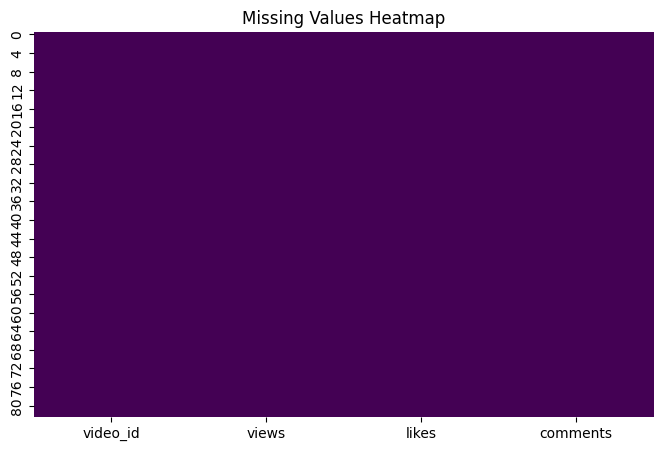

In [8]:
print("\nMissing Values Check:")
missing_values = df.isnull().sum()
print(missing_values)

# Visualisasi missing values
plt.figure(figsize=(8, 5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()

Konsistensi data

In [9]:
duplicate_rows = df[df.duplicated()]
print(f"Jumlah baris duplikat: {len(duplicate_rows)}")

Jumlah baris duplikat: 0


Akurasi Data

In [10]:
invalid_fuel = df[(df['views'] < 0) | (df['likes'] < 0) | (df['comments'] < 0)]
print(f"Jumlah data yang tidak valid: {len(invalid_fuel)}")

Jumlah data yang tidak valid: 0


In [11]:
duplcate_ids = df['video_id'].duplicated()
print(f"Jumlah ID video yang duplikat: {duplcate_ids.sum()}")

Jumlah ID video yang duplikat: 0


Cek Korelasi Antar Variabel

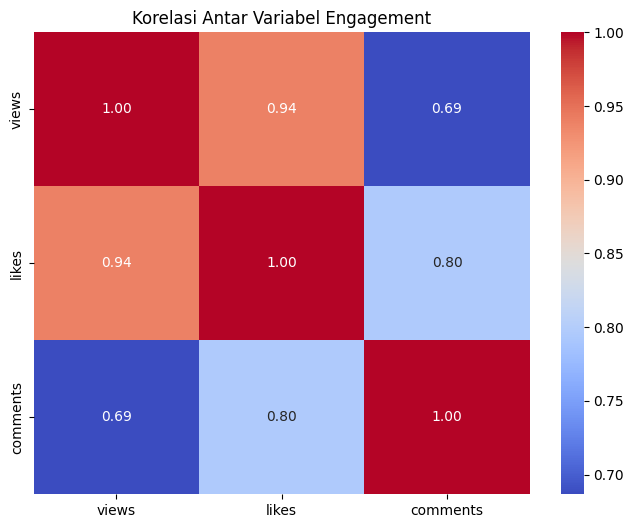

In [12]:
plt.figure(figsize=(8,6))
sns.heatmap(df[['views', 'likes', 'comments']].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Variabel Engagement")
plt.show()

Scatter Plot untuk melihat pola hubungan antar variabel

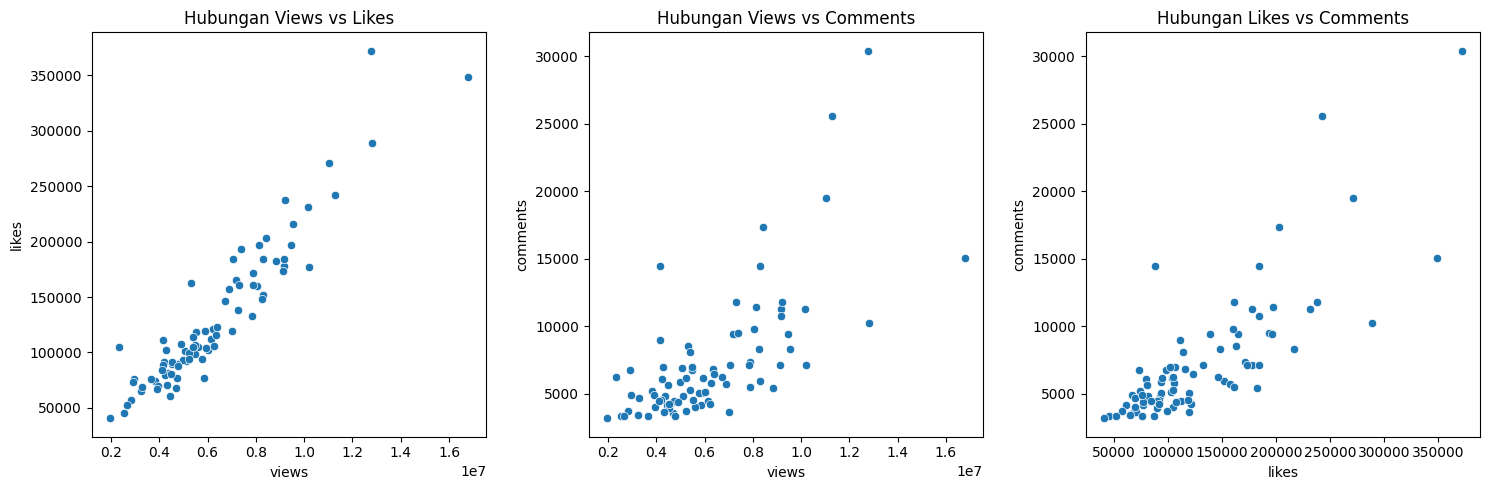

In [13]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.scatterplot(x=df["views"], y=df["likes"], ax=ax[0])
ax[0].set_title("Hubungan Views vs Likes")

sns.scatterplot(x=df["views"], y=df["comments"], ax=ax[1])
ax[1].set_title("Hubungan Views vs Comments")

sns.scatterplot(x=df["likes"], y=df["comments"], ax=ax[2])
ax[2].set_title("Hubungan Likes vs Comments")

plt.tight_layout()

plt.show()

Distribusi Data

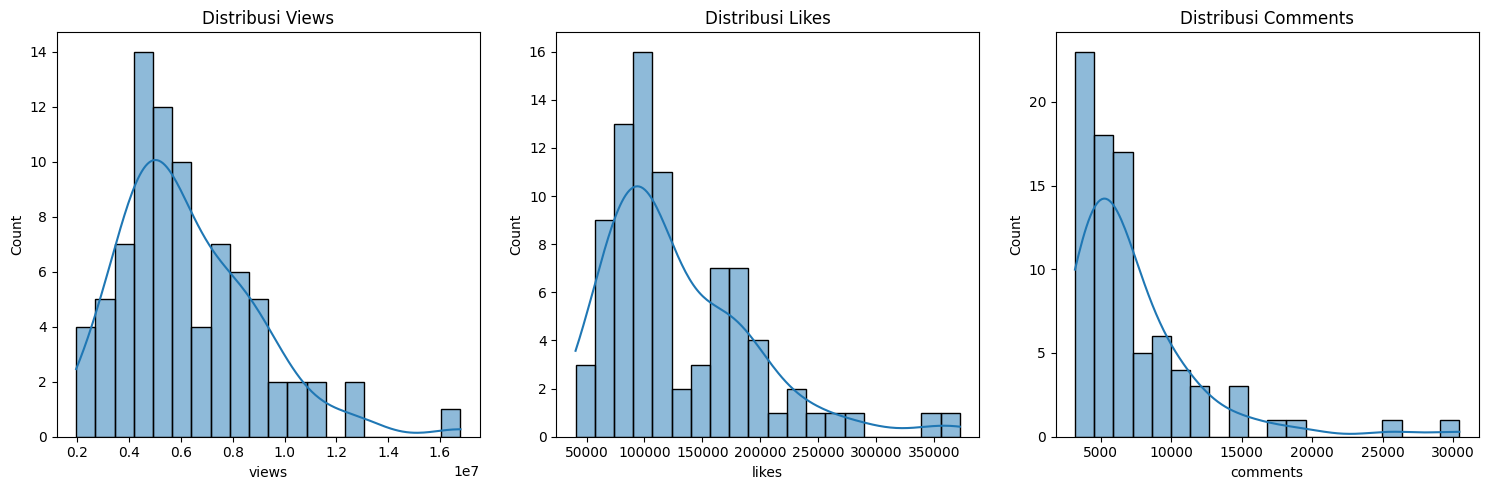

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.histplot(df["views"], bins=20, kde=True, ax=ax[0])
ax[0].set_title("Distribusi Views")

sns.histplot(df["likes"], bins=20, kde=True, ax=ax[1])
ax[1].set_title("Distribusi Likes")

sns.histplot(df["comments"], bins=20, kde=True, ax=ax[2])
ax[2].set_title("Distribusi Comments")

plt.tight_layout()
plt.show()

**Data Quality Assessment**

In [15]:
# Convert 'views', 'likes', and 'comments' komlom ke numerik
df['views'] = pd.to_numeric(df['views'])
df['likes'] = pd.to_numeric(df['likes'])
df['comments'] = pd.to_numeric(df['comments'])

# Deteksi Outlier
print("\n🔍 DATA QUALITY ASSESSMENT")
print("\nDeteksi Outlier dengan IQR Method")

# Memastikan df_selected berisi kolom numeric
df_selected = df[['views', 'likes', 'comments']]

Q1 = df_selected.quantile(0.25)
Q3 = df_selected.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = ((df_selected < lower_bound) | (df_selected > upper_bound)).sum()
print(outliers)


🔍 DATA QUALITY ASSESSMENT

Deteksi Outlier dengan IQR Method
views       1
likes       3
comments    7
dtype: int64


Cek outline dengan boxplot

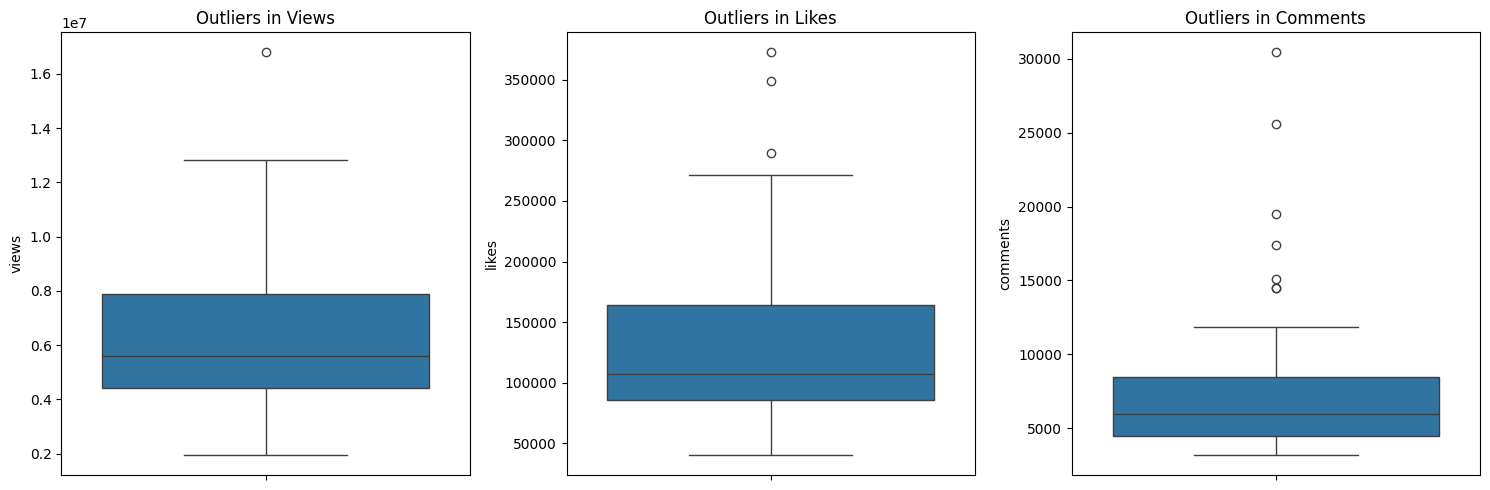

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(15,5))

sns.boxplot(y=df["views"], ax=ax[0])
ax[0].set_title("Outliers in Views")

sns.boxplot(y=df["likes"], ax=ax[1])
ax[1].set_title("Outliers in Likes")

sns.boxplot(y=df["comments"], ax=ax[2])
ax[2].set_title("Outliers in Comments")

plt.tight_layout()
plt.show()

# **Data Preperation**

Data Selection

In [17]:
# Menampilkan semua kolom
print("📌 Kolom yang tersedia:")
print(df.columns)

# Memilih hanya kolom yang relevan untuk clustering
df_selected = df[["views", "likes", "comments"]]
print("\n📌 Data setelah seleksi fitur:")
print(df_selected.head())


📌 Kolom yang tersedia:
Index(['video_id', 'views', 'likes', 'comments'], dtype='object')

📌 Data setelah seleksi fitur:
      views   likes  comments
0   4443467   60846      4164
1   5856855   76478      4159
2   4692492   67508      3555
3   6151951  112199      4487
4  10208358  177504      7153


Data Cleaning

In [18]:
from scipy.stats import zscore

Q1 = df_selected.quantile(0.25)
Q3 = df_selected.quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

threshold = 3
# Menghapus outlier
df_cleaned = df_selected[~((df_selected < lower_bound) | (df_selected > upper_bound)).any(axis=1)]

print(f"\n📌 Data setelah membersihkan outlier (sebelumnya {df_selected.shape[0]}, sekarang {df_cleaned.shape[0]})")



📌 Data setelah membersihkan outlier (sebelumnya 83, sekarang 75)


Data Transformation

In [19]:
from sklearn.preprocessing import MinMaxScaler

# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Transformasi data
df_transformed = pd.DataFrame(scaler.fit_transform(df_cleaned), columns=df_cleaned.columns)

print("\n📌 Data setelah normalisasi:")
print(df_transformed.head())


📌 Data setelah normalisasi:
      views     likes  comments
0  0.301894  0.103197  0.112512
1  0.473050  0.182322  0.111933
2  0.332050  0.136918  0.042091
3  0.508785  0.363130  0.149861
4  1.000000  0.693683  0.458141


Data Reduction


📌 Data setelah reduksi dimensi dengan PCA:
        PC1       PC2  Cluster
0 -0.391144 -0.014947        0
1 -0.250587 -0.135673        0
2 -0.397718 -0.094804        0
3 -0.105538 -0.169138        0
4  0.543569 -0.300932        1


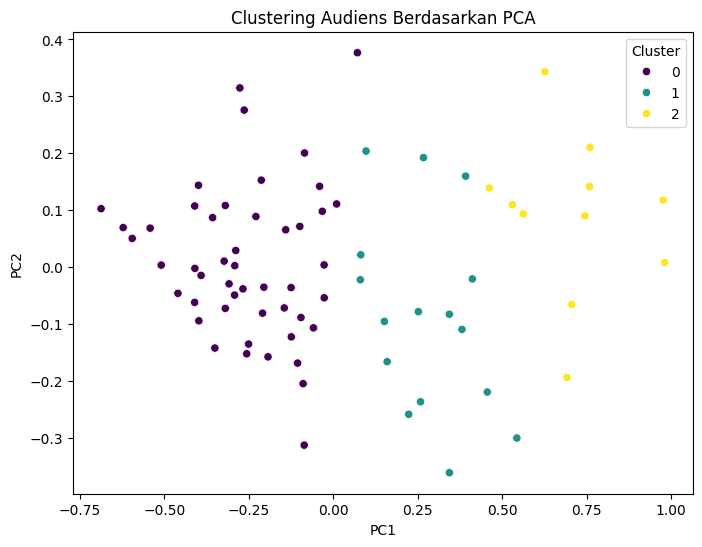

In [20]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Inisialisasi PCA untuk mereduksi ke 2 dimensi
pca = PCA(n_components=2, random_state=42)  # Inisialisasi PCA dengan 2 komponen
df_reduced = pd.DataFrame(pca.fit_transform(df_transformed), columns=["PC1", "PC2"]) # Terapkan PCA pada df_transformed

kmeans = KMeans(n_clusters=3, random_state=42)
df_reduced["Cluster"] = kmeans.fit_predict(df_reduced)

# Inisialisasi PCA untuk mereduksi ke 2 dimensi
print("\n📌 Data setelah reduksi dimensi dengan PCA:")
print(df_reduced.head())

# Visualisasi PCA
plt.figure(figsize=(8,6))
sns.scatterplot(x=df_reduced["PC1"], y=df_reduced["PC2"], hue=df_reduced["Cluster"], palette="viridis")
plt.title("Clustering Audiens Berdasarkan PCA")
plt.show()

# **Modeling**

**K-MEANS**

In [21]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(df[['views', 'likes', 'comments']])

KMeans(n_clusters=4, random_state=42)

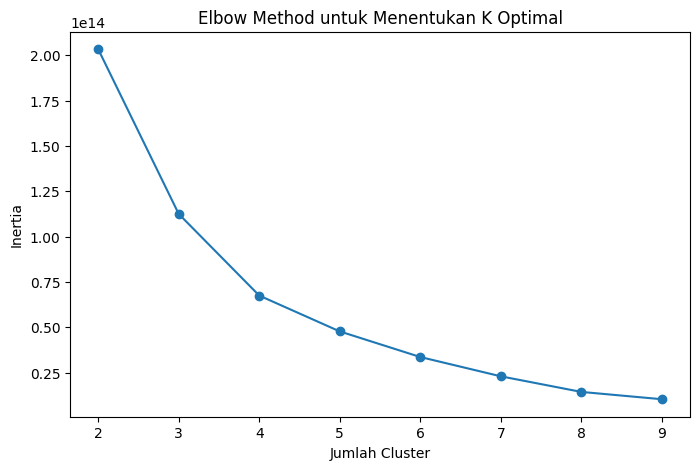

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Menentukan jumlah cluster optimal dengan Elbow Method
distortions = []
K = range(2, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df[['views', 'likes', 'comments']])
    distortions.append(kmeans.inertia_)

# Visualisasi Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, distortions, marker="o")
plt.xlabel("Jumlah Cluster")
plt.ylabel("Inertia")
plt.title("Elbow Method untuk Menentukan K Optimal")
plt.show()

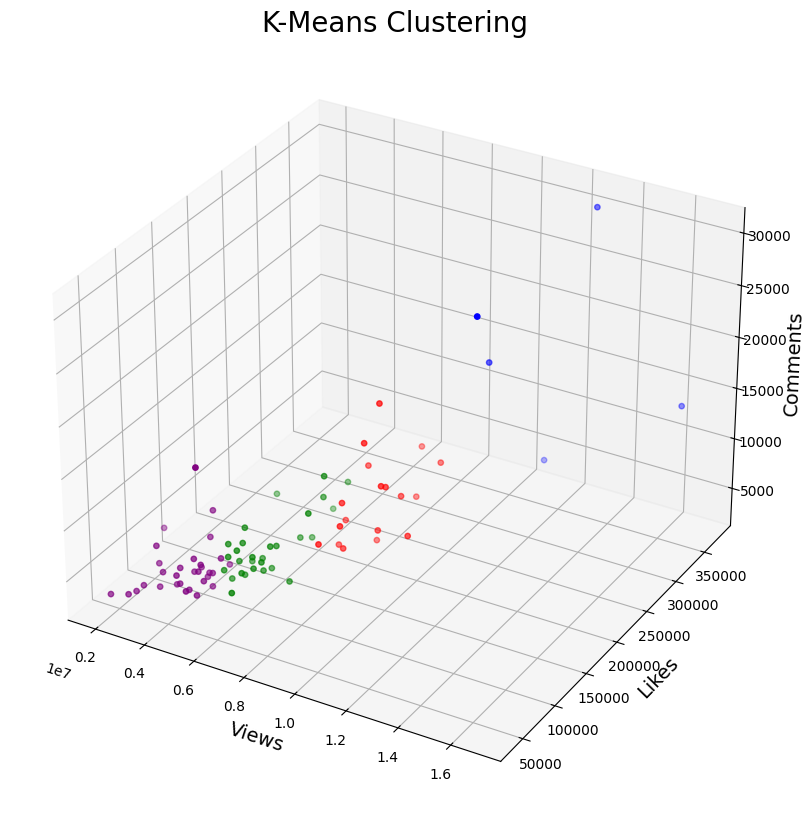

In [23]:
import matplotlib.pyplot as plt
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D

df['KMeans_labels'] = k_means.labels_

#Plot cluster yang dihasilkan
colors = ['purple', 'red', 'blue', 'green']
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['views'], df['likes'], df['comments'], c=df['KMeans_labels'], cmap=matplotlib.colors.ListedColormap(colors), s=15)
ax.set_title('K-Means Clustering', fontsize=20)
ax.set_xlabel('Views', fontsize=14)
ax.set_ylabel('Likes', fontsize=14)
ax.set_zlabel('Comments', fontsize=14)
plt.show()

In [24]:
k_means_opt = KMeans()

k_means_opt.fit(df[['views', 'likes', 'comments']])

df['k_means_opt_labels'] = k_means_opt.labels_
df['k_means_opt_labels'].value_counts()

,count
k_means_opt_labels,
1,24
3,20
0,16
4,9
7,7
6,4
2,2
5,1


**DBSCAN**

In [25]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[['views', 'likes', 'comments']])

DBSCAN()

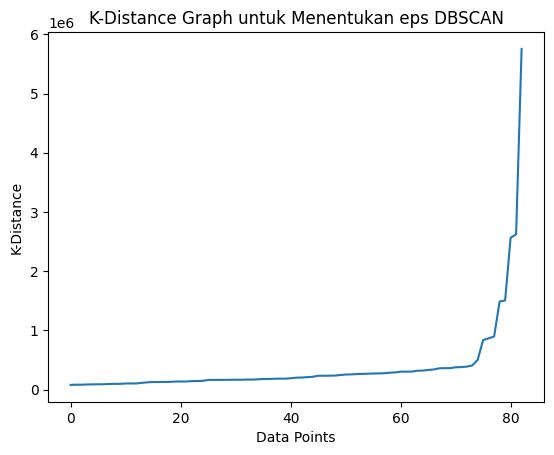

In [26]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df[['views', 'likes', 'comments']])
distances, indices = neighbors_fit.kneighbors(df[['views', 'likes', 'comments']])

# Plot k-distance graph
distances = np.sort(distances[:, 4], axis=0)
plt.plot(distances)
plt.xlabel("Data Points")
plt.ylabel("K-Distance")
plt.title("K-Distance Graph untuk Menentukan eps DBSCAN")
plt.show()

In [27]:
df['DBSCAN_labels']=dbscan.labels_
print(df.head())

      video_id     views   likes  comments  KMeans_labels  k_means_opt_labels  \
0  EMZdc03JWEg   4443467   60846      4164              0                   1   
1  sNw4Hf9qeko   5856855   76478      4159              3                   3   
2  M3jIteZtZAo   4692492   67508      3555              0                   1   
3  -j_yu-qc9eY   6151951  112199      4487              3                   3   
4  t7n4PW-ofNg  10208358  177504      7153              1                   6   

   DBSCAN_labels  
0             -1  
1             -1  
2             -1  
3             -1  
4             -1  


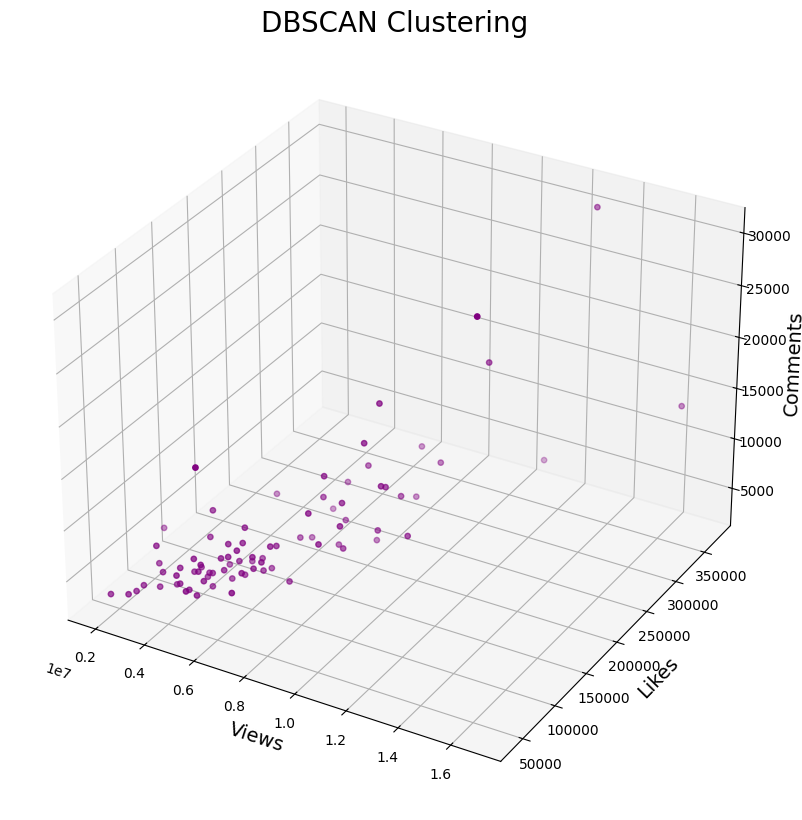

In [28]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['views'], df['likes'], df['comments'], c=df['DBSCAN_labels'], cmap=matplotlib.colors.ListedColormap(colors), s=15)
ax.set_title('DBSCAN Clustering', fontsize=20)
ax.set_xlabel('Views', fontsize=14)
ax.set_ylabel('Likes', fontsize=14)
ax.set_zlabel('Comments', fontsize=14)
plt.show()

In [29]:
dbscan_opt = DBSCAN()

dbscan_opt.fit(df[['views', 'likes', 'comments']])

df['DBSCAN_opt_labels'] = dbscan_opt.labels_
df['DBSCAN_opt_labels'].value_counts()

,count
DBSCAN_opt_labels,
-1,83
